# All volatility indicators

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import classification_report_generator as crg
from ta.volatility import AverageTrueRange
from ta.volatility import BollingerBands
from ta.volatility import DonchianChannel
from ta.volatility import KeltnerChannel
from ta.volatility import UlcerIndex
import sys
sys.path.insert(0, '..')
import useful_functions as uf

In [26]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
# df = pd.read_csv("../data/BTCUSDT-hour-target-dip.csv") #dip
# df = pd.read_csv("../data/BTCUSDT-minute-target-tpsl.csv") #tpsl
df = pd.read_csv("../data/BTCUSDT-minute-target-ui.csv") #atr tpsl


# df = pd.read_csv("../data/BTCUSDT-hour-target-features.csv") #Default continuing
# df = pd.read_csv("../data/BTCUSDT-minute-target-dip-features.csv") #Continuing minute

# df = pd.read_csv("../data/BTCUSDT-hour-predict.csv") #Prediction

p = "volatility_" #change to 'volatility_' to have all indicators with prefix 'volatility_'

In [27]:
# ATR
atr = AverageTrueRange(df["high"], df["low"], df["close"], 14)
df[p + "atr_14"] = atr.average_true_range()
df[p + "atr_o_close"] = list(map(lambda a, c: a/c, df[p + "atr_14"], df.close))

In [28]:
# BB
bb = BollingerBands(df["close"], window=10, window_dev=2)
df[p + "bb_wband_10"] = bb.bollinger_wband()

bb = BollingerBands(df["close"], window=100, window_dev=2)
df[p + "bb_pband_100"] = bb.bollinger_pband()

bb = BollingerBands(df["close"], window=200, window_dev=2)
df[p + "bb_wband_200"] = bb.bollinger_wband()

bb = BollingerBands(df["close"], window=20, window_dev=2)
df[p + "bb_hband_o_close"] = list(map(lambda l, c: (l-c)/c, bb.bollinger_hband(), df.close))

In [29]:
# DC
dc = DonchianChannel(df.high, df.low, df.close, window=50)
df[p + "dc_pband_50"] = dc.donchian_channel_pband()
dc = DonchianChannel(df.high, df.low, df.close, window=10)
df[p + "dc_wband_10"] = dc.donchian_channel_wband()

In [30]:
# KC
kc = KeltnerChannel(df.high, df.low, df.close, window=50)
df[p + "pband_50"] = kc.keltner_channel_pband()
kc = KeltnerChannel(df.high, df.low, df.close, window=20)
df[p + "wband_20"] = kc.keltner_channel_wband()

In [31]:
# UI
ui = UlcerIndex(df.close, window=30)
df[p + "ui_30"] = ui.ulcer_index()

In [18]:
# df.to_csv("../data/BTCUSDT-hour-target-features.csv", index=False) #Default
# df.to_csv("../data/BTCUSDT-minute-target-dip-features.csv", index=False) #Minute
df.to_csv("../data/BTCUSDT-minute-target-tpsl-features.csv", index=False) #Minute tpsl


# df.to_csv("../data/BTCUSDT-hour-predict.csv", index=False) #Prediction

## STOP!

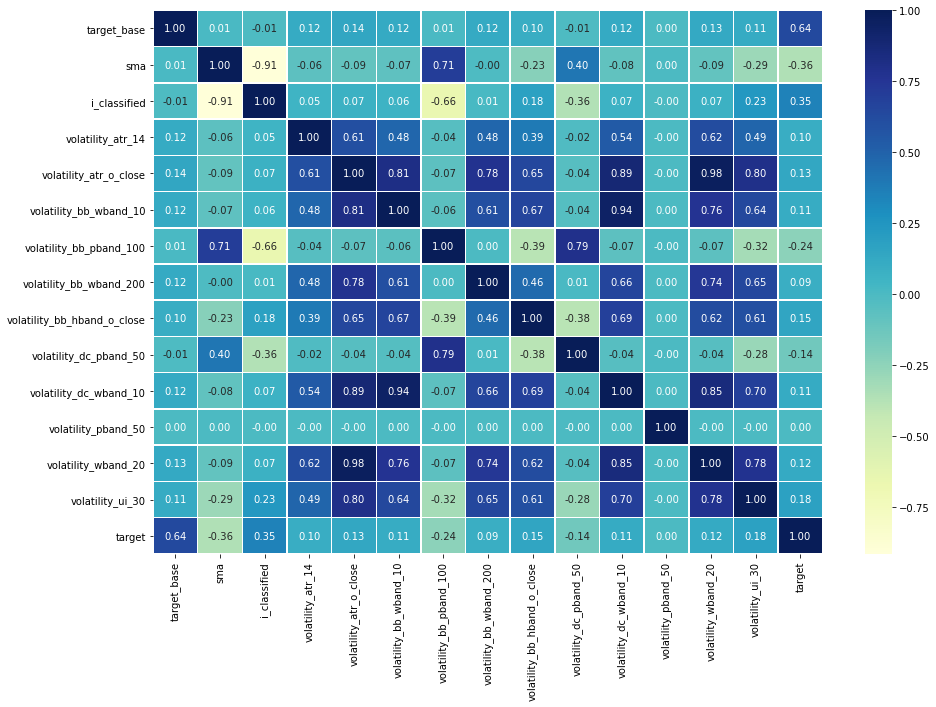

In [32]:
indicators = list(df.columns)[14:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Foward Testing

In [70]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df.copy()
d.dropna(inplace=True)
close = d["close"]
d = d[list(indicators)].copy()

X = d.drop(["target"], axis=1)
y = d["target"]

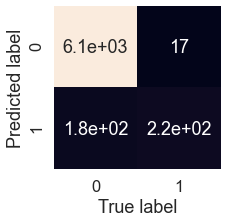

In [71]:
crg.plot_conf_matrix(X, y)

In [72]:
crg.generate_report(X, y)

{'precision': 0.18534825355374615,
 'recall': 0.22575757575757574,
 'f1': 0.105662683515055}

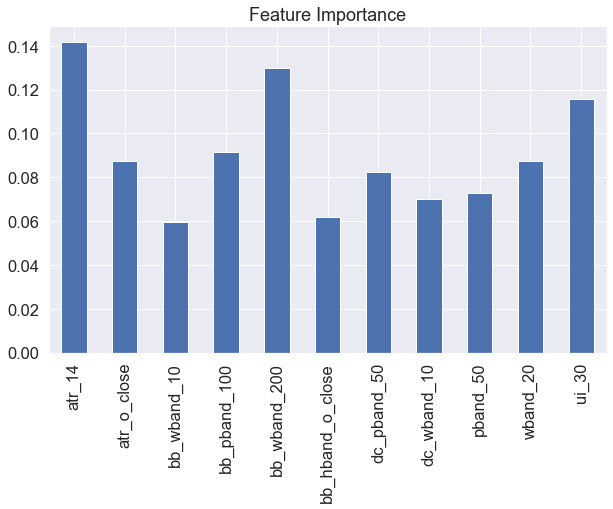

In [73]:
crg.feature_importance(X, y, plot=True)

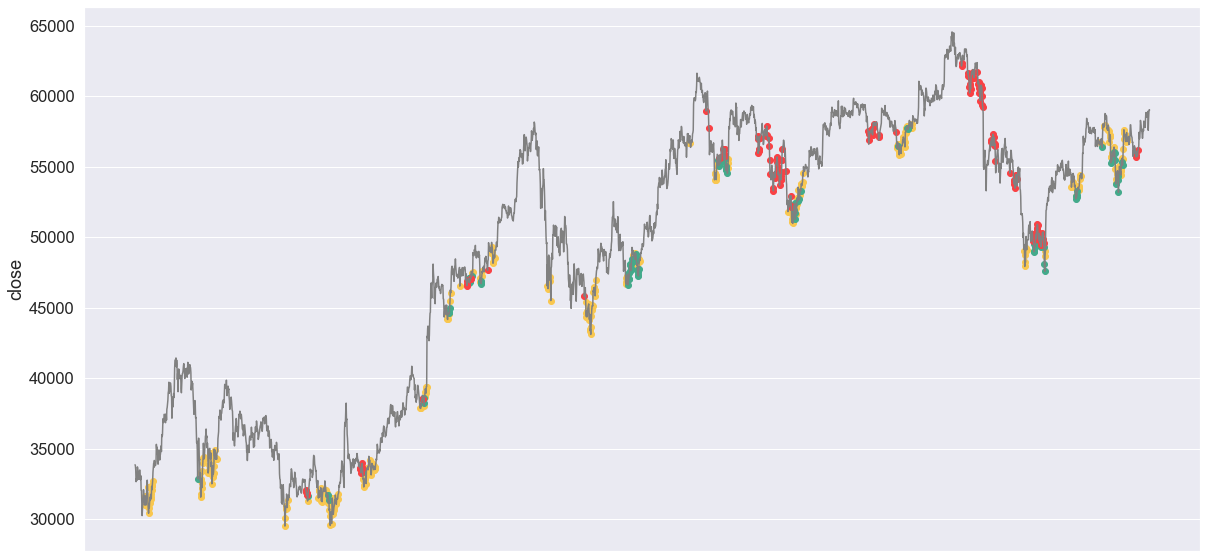

In [74]:
crg.forward_test(X, y, close, mistakes=True)